# Martin Krücke, Jana Kölher and Martin Iniguez de Onzono Muruaga
# Sheet 10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

## Exercise 2. Regression with the nu-SVR

### a) Train the nu-SVR on the training set with the standard parameters of your library.

In [2]:
train = pd.read_csv("TrainingRidge.csv", delimiter=",")
train_data = np.vstack((np.array(train['x1']),np.array(train['x2']))).T
labels_train = np.array(train['obs'])

test = pd.read_csv("ValidationRidge.csv", delimiter=",")
test_data = np.vstack((np.array(test['x1']),np.array(test['x2']))).T
labels_test = np.array(test['dens'])

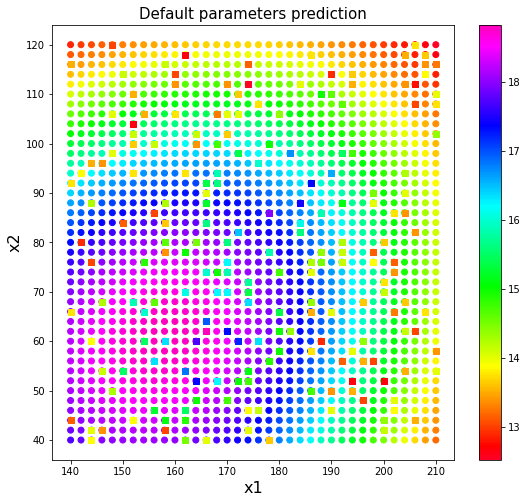

In [3]:
nu_svr = svm.NuSVR(nu=0.5)
nu_svr.fit(train_data,labels_train)

test_predict1 = nu_svr.predict(test_data)

fig, ax = plt.subplots(figsize=(9,8))
c1=plt.scatter(test_data[:,0],test_data[:,1],c=test_predict1,cmap='gist_rainbow')
plt.xlabel('x1',fontsize=16)
plt.ylabel('x2',fontsize=16)
plt.title('Default parameters prediction',fontsize=15)
fig.colorbar(c1,ax=ax);

plt.scatter(train_data[:,0],train_data[:,1],c=labels_train,marker='s',cmap='gist_rainbow');

In [6]:
mse_1 = round(mean_squared_error(labels_test,test_predict1),2)

print('The MSE of the NuSVR with the default parameters is ' +str(mse_1))

The MSE of the NuSVR with the default parameters is 65.66


### b) Perform a 10-fold cross-validation with a nu-SVR with parameters nu=0.5, and different values of gamma and C.

In [7]:
# Performing cross-validation algorithm for all C's and gammas 

kfold= KFold(10, shuffle=True, random_state=1)

C=np.float(2)**(np.linspace(-2,12.0001,20))
gamma=np.float(2)**(np.linspace(-12,0.0001,20))

mse_mean = np.zeros((len(C),len(gamma)))
                          
for i,C_exp in enumerate(C):
    
    for j,gamma_exp in enumerate(gamma):
        
        mse = np.zeros(10)
        num = 0

        for train, test in kfold.split(train_data):

            rbf_svr = svm.NuSVR(C=C_exp,gamma=gamma_exp)
            rbf_svr.fit(train_data[train],labels_train[train])
           
            pred = rbf_svr.predict(train_data[test])
            mse[num] = round(mean_squared_error(pred,labels_train[test]),2)
            num += 1
           
        mse_mean[i][j] = np.mean(mse)

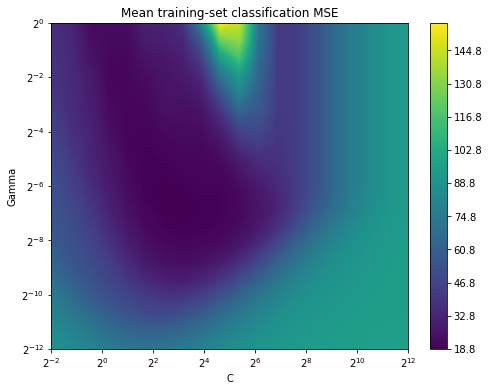

In [8]:
# Creating the countour plots

fig, ax = plt.subplots(figsize=(8,6))

c1=ax.contourf(C,gamma,mse_mean, levels=400)
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax.set_title('Mean training-set classification MSE');
fig.colorbar(c1, ax=ax);
ax.set_xlabel('C')
ax.set_ylabel('Gamma');

### c) Extract the best parameter combination C and gamma. Use the entire training set to train a new nu-SVR with these parameters.

In [9]:
# Finding the best C and gamma

ind = np.argmin(mse_mean)
row_ind , col_ind = np.unravel_index(ind,mse_mean.shape)

#Fitting the model 

svc = svm.NuSVR(C=C[row_ind],gamma=gamma[col_ind])
svc.fit(train_data,labels_train);

test_predict2 = svc.predict(test_data)
mse2 = round(mean_squared_error(test_predict2,labels_test),2)
print('The MSE on the best parameters is ' +str(mse2) + '.')

The MSE on the best parameters is 3.28.


#### 1. Plot the model prediction for the validation set as an image plot. Compare the plot with the true labels and the results from (a).

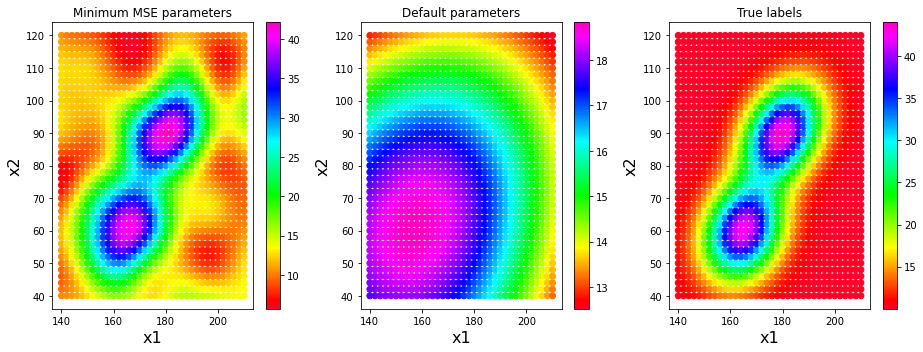

In [10]:
fig , ax = plt.subplots(figsize=(13,5),ncols=3)

c1=ax[0].scatter(test_data[:,0],test_data[:,1],c=test_predict2,cmap='gist_rainbow')
ax[0].set_xlabel('x1',fontsize=16)
ax[0].set_ylabel('x2',fontsize=16)
ax[0].set_title('Minimum MSE parameters')
fig.colorbar(c1, ax=ax[0]);

c2=ax[1].scatter(test_data[:,0],test_data[:,1],c=test_predict1,cmap='gist_rainbow')
ax[1].set_xlabel('x1',fontsize=16)
ax[1].set_ylabel('x2',fontsize=16)
ax[1].set_title('Default parameters')
fig.colorbar(c2, ax=ax[1]);

c3=ax[2].scatter(test_data[:,0],test_data[:,1],c=labels_test,cmap='gist_rainbow')
ax[2].set_xlabel('x1',fontsize=16)
ax[2].set_ylabel('x2',fontsize=16)
ax[2].set_title('True labels');
fig.colorbar(c3, ax=ax[2]);

fig.tight_layout()

#### 2. Visualize the mean squared error for the validation set as a heat map for comparison.

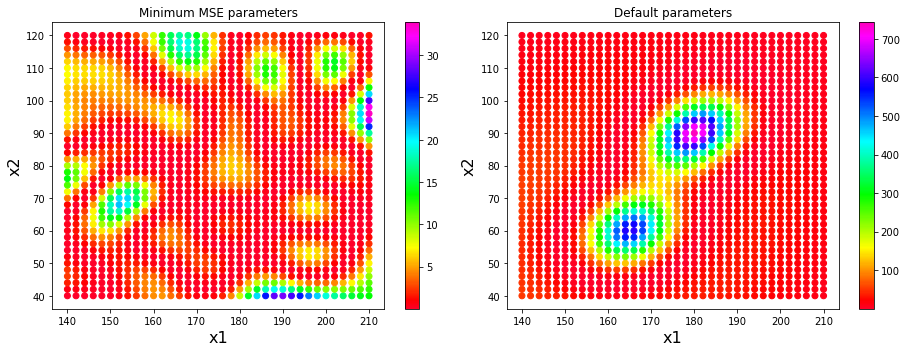

In [11]:
mse_minimum = (test_predict2-labels_test)**2
mse_default = (test_predict1-labels_test)**2

fig , ax = plt.subplots(figsize=(13,5),ncols=2)

c1 = ax[0].scatter(test_data[:,0],test_data[:,1],c=mse_minimum,cmap='gist_rainbow')
ax[0].set_xlabel('x1',fontsize=16)
ax[0].set_ylabel('x2',fontsize=16)
ax[0].set_title('Minimum MSE parameters')
fig.colorbar(c1, ax=ax[0]);

c2 = ax[1].scatter(test_data[:,0],test_data[:,1],c=mse_default,cmap='gist_rainbow')
ax[1].set_xlabel('x1',fontsize=16)
ax[1].set_ylabel('x2',fontsize=16)
ax[1].set_title('Default parameters')
fig.colorbar(c2, ax=ax[1]);
fig.tight_layout()